In [31]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
words = open('names.txt').read().splitlines()

In [3]:
max(len(w) for w in words)

15

## Bigrams

A bigram is a sequence of 2 letters that appear sequentially. For example in the name "Eric" we have (Er, ri, ic). We'll use the frequency of the bigrams to predict what is the most probable next letter in a random name.

In [10]:
b = {}

# Extract all the bigrams from the list of names
for w in words:
    # We add 2 magic characters to define the beginning and end of the word
    # so we know which character is most likely to be at the beginning and end of the word
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        b[(ch1, ch2)] = b.get((ch1, ch2), 0) + 1

# Sort the bigrams by the count in reverse order (more occurrences first)
sorted(b.items(), key=lambda x: x[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

## PyTorch

We'll store the information of our bigrams in a 2 dimensional array where the first dimension (x) is the first character and the second (y) is the second character. To do that we'll use PyTorch tensor.

In [35]:
chars = sorted(list(set(''.join(words))))
# Lookup table for each character
stoi = {s: i for i, s in enumerate(chars)}
# Add magic characters
stoi['<S>'] = 26
stoi['<E>'] = 27
itos = {i: s for s, i in stoi.items()}

In [36]:
N = torch.zeros((28, 28), dtype=torch.int32)

# Extract all the bigrams from the list of names
for w in words:
    # We add 2 magic characters to define the beginning and end of the word
    # so we know which character is most likely to be at the beginning and end of the word
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        N[stoi[ch1], stoi[ch2]] += 1

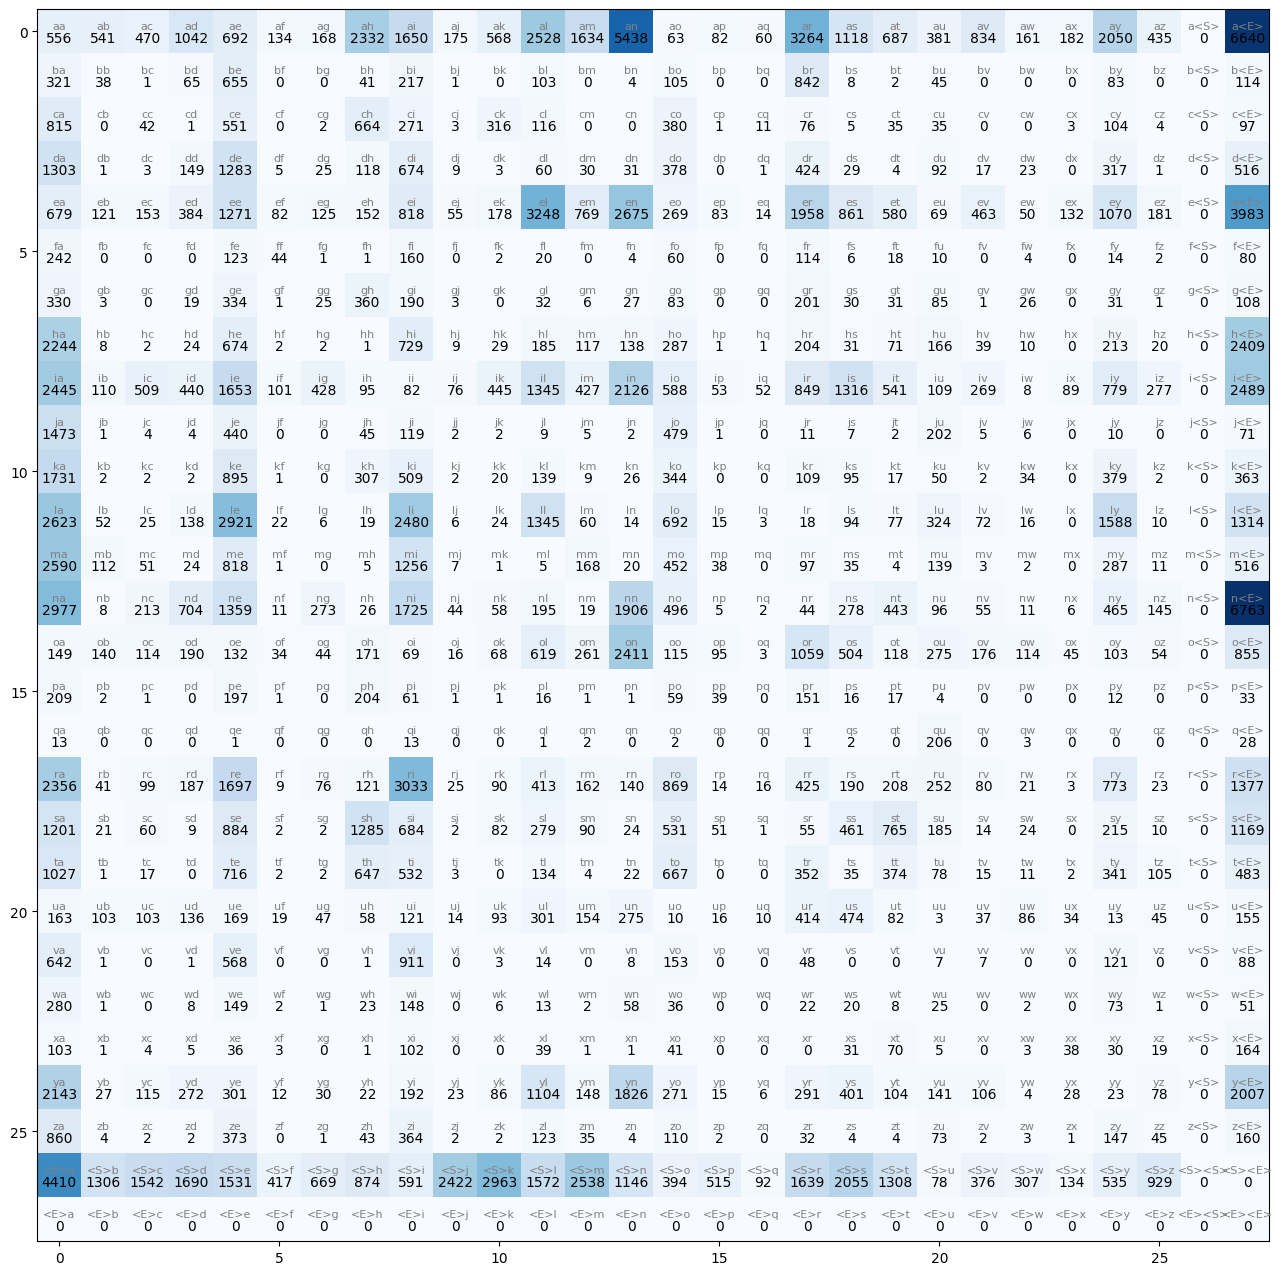

In [49]:
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', fontsize=8, color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', fontsize=10, color='black')
